In [58]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import power_transform
from sklearn.cluster import KMeans

Carga del Dataset

In [4]:
dataset = pd.read_csv('BankChurners.csv', sep=",")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Análisis Exploratoria del Dataset

Análisis estadistico del dataset

In [7]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Busqueda de valores nulos

In [8]:
dataset.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Cambiar  nombres a columnas con nombre largo

In [19]:
# Obtener los nombres originales de las columnas
nombres_columnas = dataset.columns.tolist()

# Definir abreviaturas para las dos columnas específicas
abreviaturas = {
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "NB_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "NB_2"
}

# Renombrar solo las dos columnas específicas utilizando las abreviaturas
dataset.rename(columns=abreviaturas, inplace=True)

In [20]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_1', 'NB_2'],
      dtype='object')

Distribución de las variables numericas

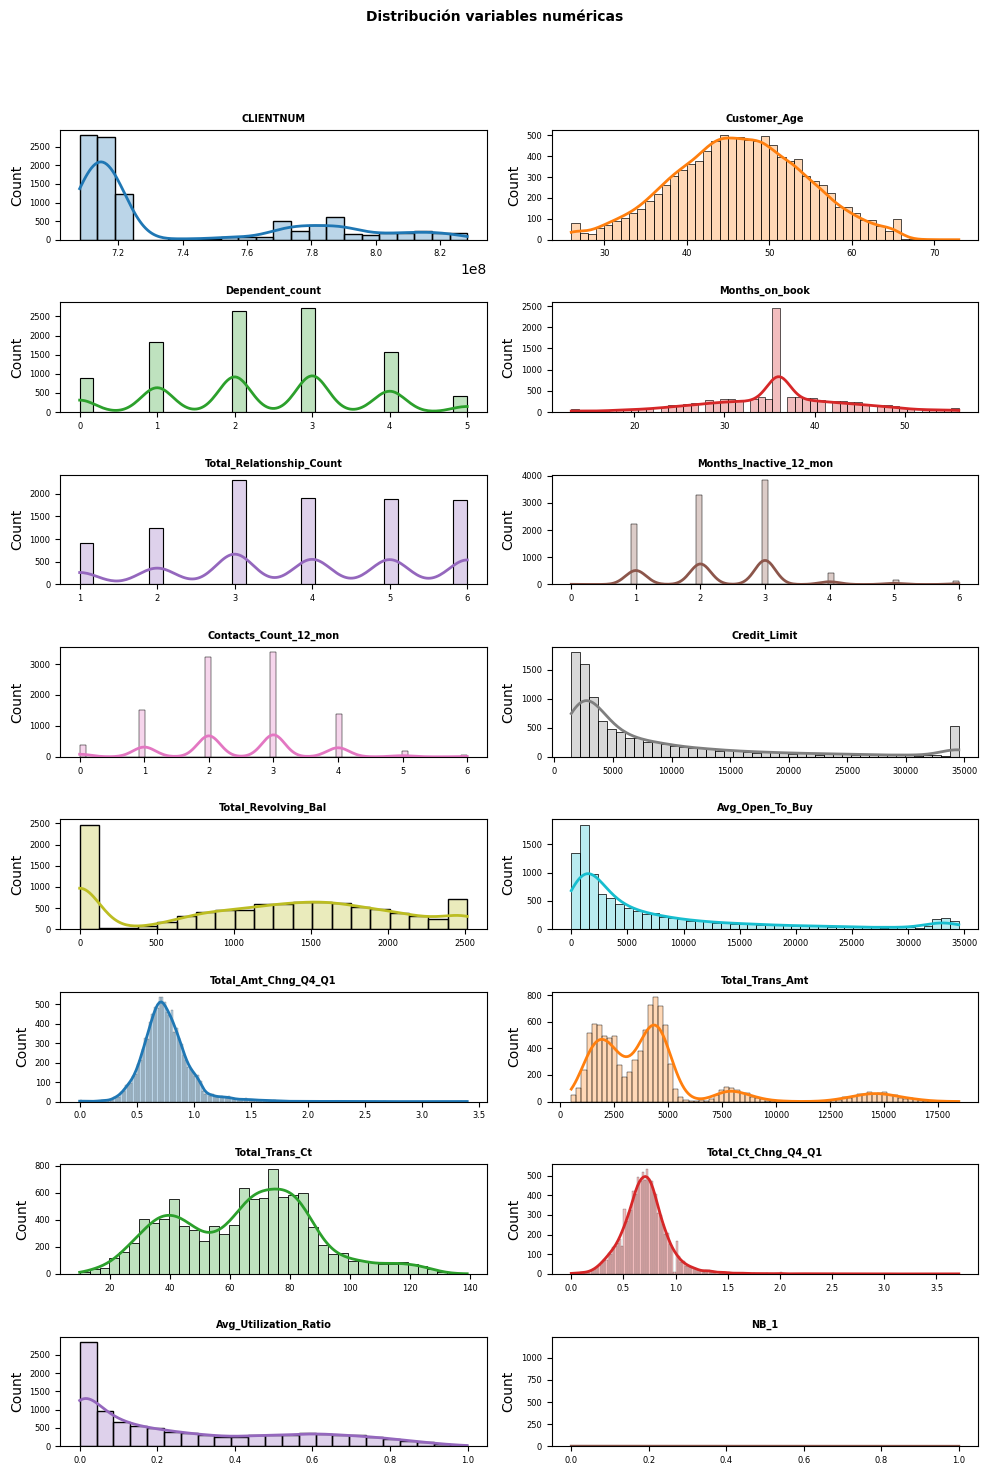

In [21]:
# Ajustar número de subplots en función del número de columnas
columnas_numeric = dataset.select_dtypes(include=['float64', 'int']).columns
num_columnas = len(columnas_numeric)
num_subplots = min(16, num_columnas) 
num_filas = (num_subplots + 1) // 2  

fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize=(10, 15))
axes = axes.flat

for i in range(num_subplots):
    sns.histplot(
        data=dataset,
        x=columnas_numeric[i],
        stat="count",
        kde=True,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(columnas_numeric[i], fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")
plt.show()

Analisis de correlación de variables numericas

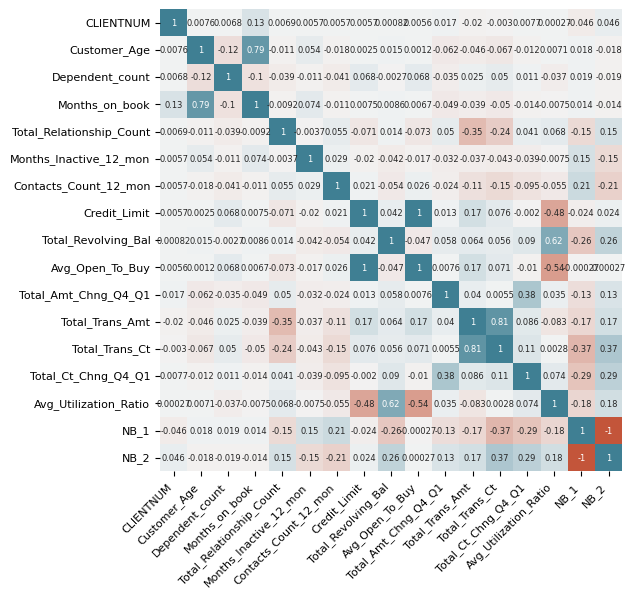

In [22]:
# Heatmap matriz de correlaciones

corr_matrix = dataset.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Tabla de correlacion de variables en orden descendente

In [25]:
# Tabla de correlacion de Variables numéricas con respecto a la variable Credit limit
correlation_with_credit_limit = corr_matrix['Credit_Limit']

correlation_with_credit_limit = pd.DataFrame(correlation_with_price)

# Ordena el DataFrame por el valor de correlación en orden descendente
correlation_with_credit_limit = correlation_with_credit_limit.sort_values(by='Credit_Limit', ascending=False)

print(correlation_with_credit_limit)

                          Credit_Limit
Credit_Limit                  1.000000
Avg_Open_To_Buy               0.995981
Total_Trans_Amt               0.171730
Total_Trans_Ct                0.075927
Dependent_count               0.068065
Total_Revolving_Bal           0.042493
NB_2                          0.023853
Contacts_Count_12_mon         0.020817
Total_Amt_Chng_Q4_Q1          0.012813
Months_on_book                0.007507
CLIENTNUM                     0.005708
Customer_Age                  0.002476
Total_Ct_Chng_Q4_Q1          -0.002020
Months_Inactive_12_mon       -0.020394
NB_1                         -0.023853
Total_Relationship_Count     -0.071386
Avg_Utilization_Ratio        -0.482965


Selección de variables con los valores de correlación más alto

In [27]:
data_clean = dataset[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']]
data_clean

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
0,12691.0,11914.0,1144
1,8256.0,7392.0,1291
2,3418.0,3418.0,1887
3,3313.0,796.0,1171
4,4716.0,4716.0,816
...,...,...,...
10122,4003.0,2152.0,15476
10123,4277.0,2091.0,8764
10124,5409.0,5409.0,10291
10125,5281.0,5281.0,8395


Análisis estadistico del nuevo dataset

In [28]:
data_clean.describe()

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
count,10127.000000,10127.000000,10127.000000
mean,8631.953698,7469.139637,4404.086304
std,9088.776650,9090.685324,3397.129254
min,1438.300000,3.000000,510.000000
25%,2555.000000,1324.500000,2155.500000
50%,4549.000000,3474.000000,3899.000000
75%,11067.500000,9859.000000,4741.000000
max,34516.000000,34516.000000,18484.000000


In [30]:
data_clean.shape

(10127, 3)

# Tratamiento de valores atípicos

Método IQR

In [31]:
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    #temp[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =2555.0 Q3=11067.5 IQR =8512.5 umbral_inferior = -10213.75 umbral_superior =23836.25
Q1 =1324.5 Q3=9859.0 IQR =8534.5 umbral_inferior = -11477.25 umbral_superior =22660.75
Q1 =2155.5 Q3=4741.0 IQR =2585.5 umbral_inferior = -1722.75 umbral_superior =8619.25


/var/folders/4j/dcxs948x2_z98dj_6scrl76m0000gn/T/ipykernel_2953/178902799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
/var/folders/4j/dcxs948x2_z98dj_6scrl76m0000gn/T/ipykernel_2953/178902799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
/var/folders/4j/dcxs948x2_z98dj_6scrl76m0000gn/T/ipykernel_2953/178902799.py:14: S

Visualización de los valores Outliers en el dataset

/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


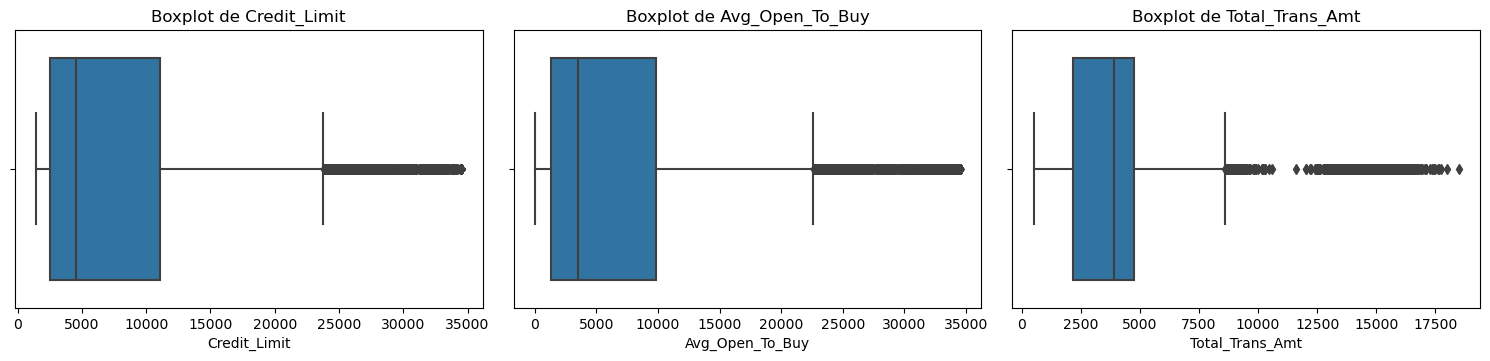

In [44]:
col_numeric = data_clean.select_dtypes(include=['float64', 'int']).columns

# Crear subplots para los gráficos de boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_numeric, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_clean[col], orient='vertical')
    plt.title(f'Boxplot de {col}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [32]:
data_clean

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Credit_Limit_outliers,Avg_Open_To_Buy_outliers,Total_Trans_Amt_outliers
0,12691.0,11914.0,1144,False,False,False
1,8256.0,7392.0,1291,False,False,False
2,3418.0,3418.0,1887,False,False,False
3,3313.0,796.0,1171,False,False,False
4,4716.0,4716.0,816,False,False,False
...,...,...,...,...,...,...
10122,4003.0,2152.0,15476,False,False,True
10123,4277.0,2091.0,8764,False,False,True
10124,5409.0,5409.0,10291,False,False,True
10125,5281.0,5281.0,8395,False,False,False


Revisión de valores atípicos por varibale

In [35]:
data_clean.groupby(by='Credit_Limit_outliers').count()

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Open_To_Buy_outliers,Total_Trans_Amt_outliers
Credit_Limit_outliers,,,,,
False,9143,9143,9143,9143,9143
True,984,984,984,984,984


In [36]:
data_clean.groupby(by='Avg_Open_To_Buy_outliers').count()

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Credit_Limit_outliers,Total_Trans_Amt_outliers
Avg_Open_To_Buy_outliers,,,,,
False,9164,9164,9164,9164,9164
True,963,963,963,963,963


In [37]:
data_clean.groupby(by='Total_Trans_Amt_outliers').count()

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Credit_Limit_outliers,Avg_Open_To_Buy_outliers
Total_Trans_Amt_outliers,,,,,
False,9231,9231,9231,9231,9231
True,896,896,896,896,896


Eliminar valores Outliers del dataset

In [39]:
data_noout =  data_clean[data_clean['Credit_Limit_outliers'] == False]
data_noout = data_noout[data_noout['Avg_Open_To_Buy_outliers'] == False]
data_noout = data_noout[data_noout['Total_Trans_Amt_outliers'] == False]
data_noout.reset_index(drop=True)

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Credit_Limit_outliers,Avg_Open_To_Buy_outliers,Total_Trans_Amt_outliers
0,12691.0,11914.0,1144,False,False,False
1,8256.0,7392.0,1291,False,False,False
2,3418.0,3418.0,1887,False,False,False
3,3313.0,796.0,1171,False,False,False
4,4716.0,4716.0,816,False,False,False
...,...,...,...,...,...,...
8423,3709.0,2529.0,8130,False,False,False
8424,4167.0,4167.0,7590,False,False,False
8425,9611.0,9611.0,7636,False,False,False
8426,14657.0,12140.0,6009,False,False,False


In [48]:
data_noout.describe()

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
count,8428.000000,8428.000000,8428.000000
mean,5887.007724,4740.660430,3470.583887
std,5068.040532,5090.350639,1612.486862
min,1438.300000,3.000000,510.000000
25%,2354.750000,1073.000000,2064.000000
50%,3614.500000,2542.500000,3680.000000
75%,7901.750000,6732.500000,4519.000000
max,23700.000000,22599.000000,8618.000000


Revisión posttratamiento de valores Outliers

/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


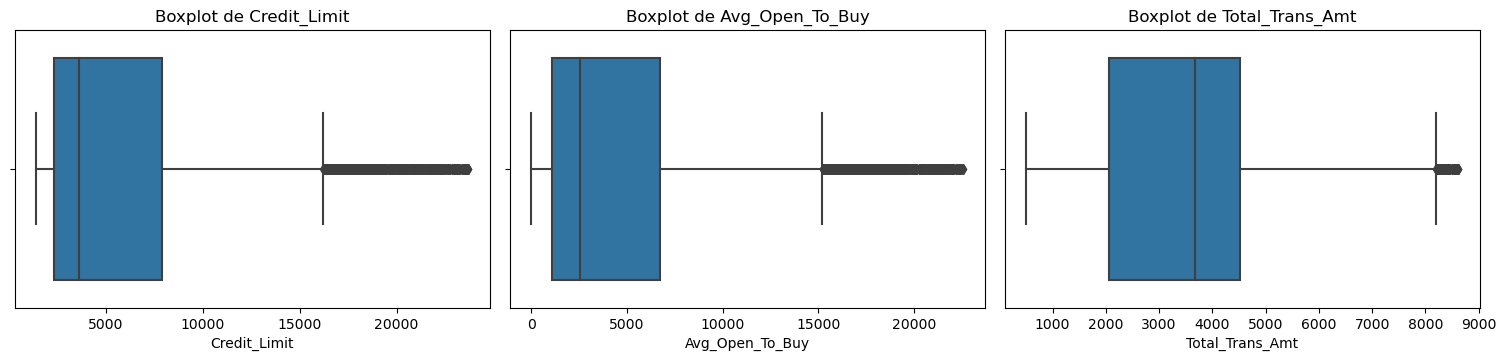

In [43]:
col_numeric = data_noout.select_dtypes(include=['float64', 'int']).columns

# Crear subplots para los gráficos de boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_numeric, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_noout[col], orient='vertical')
    plt.title(f'Boxplot de {col}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

# Tranformación de variables

In [50]:
data_noout = data_noout[['Credit_Limit', 'Avg_Open_To_Buy' , 'Total_Trans_Amt']]
data_noout

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
0,12691.0,11914.0,1144
1,8256.0,7392.0,1291
2,3418.0,3418.0,1887
3,3313.0,796.0,1171
4,4716.0,4716.0,816
...,...,...,...
10054,3709.0,2529.0,8130
10067,4167.0,4167.0,7590
10089,9611.0,9611.0,7636
10119,14657.0,12140.0,6009


Aplicando transformación BOX-COX

In [51]:
data_bc = power_transform(X=data_noout, method='box-cox')
data_bc = pd.DataFrame(data_bc, columns=data_noout.columns)
data_bc

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
0,1.342409,1.338924,-1.726245
1,0.908895,0.889786,-1.563287
2,-0.197330,0.193960,-0.993568
3,-0.242651,-1.025448,-1.695449
4,0.244072,0.479940,-2.139657
...,...,...,...
8423,-0.080829,-0.068068,2.298215
8424,0.079870,0.369250,2.093234
8425,1.069172,1.135002,2.111015
8426,1.474449,1.356905,1.439767


Revisión de la distribución post transformación

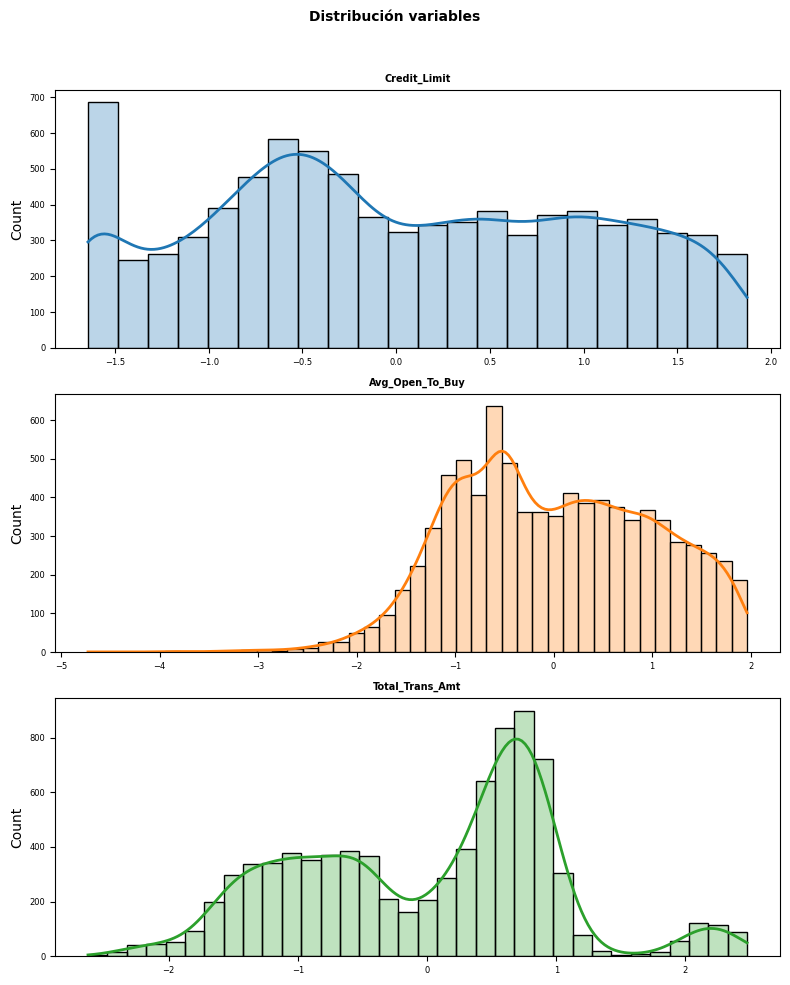

In [57]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))
axes = axes.flat
columnas_numeric = data_bc.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = data_bc,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 10, fontweight = "bold");

# Creación del modelo k-means

In [59]:
inercia = []
ks = []

for k in range(1,25):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

In [60]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)

<Axes: xlabel='k', ylabel='inercia'>

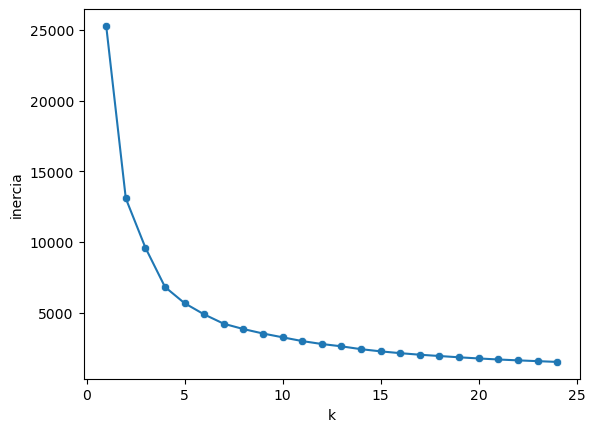

In [61]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [62]:
modelo = KMeans(n_clusters=5,random_state = 10)
modelo.fit(data_bc)

/Users/jonmaldosan/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=10)

In [63]:
data_noout['cluster'] = modelo.labels_
data_noout

/var/folders/4j/dcxs948x2_z98dj_6scrl76m0000gn/T/ipykernel_2953/489275258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noout['cluster'] = modelo.labels_


,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,cluster
0,12691.0,11914.0,1144,2
1,8256.0,7392.0,1291,2
2,3418.0,3418.0,1887,4
3,3313.0,796.0,1171,4
4,4716.0,4716.0,816,2
...,...,...,...,...
10054,3709.0,2529.0,8130,0
10067,4167.0,4167.0,7590,0
10089,9611.0,9611.0,7636,1
10119,14657.0,12140.0,6009,1


In [64]:
data_noout.groupby(by='cluster').count()

,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt
cluster,,,
0,1455,1455,1455
1,1273,1273,1273
2,1641,1641,1641
3,2254,2254,2254
4,1805,1805,1805
